# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Solve a simple Linear Regression problem with PyTorch.


#Solve a simple Linear Regression problem

Find the linear relationship between a dependent variable 'y' and an independent variable 'x'.

Equation: y = 3x + 4

In [2]:
## create dummy data for training
import numpy as np
x_train = np.random.uniform(low=0.0, high=10.0, size=(15,))
print(x_train)
x_train = x_train.astype(np.float32).reshape(-1, 1)
print(x_train)

[8.13665335 1.31155016 1.5324479  7.1849716  4.04929399 1.63335843
 7.0079119  3.60084138 3.16534209 9.28666612 6.53898008 6.03289079
 0.06310462 6.21975632 5.9832648 ]
[[8.136653  ]
 [1.3115501 ]
 [1.5324479 ]
 [7.184972  ]
 [4.049294  ]
 [1.6333585 ]
 [7.0079117 ]
 [3.6008413 ]
 [3.165342  ]
 [9.286666  ]
 [6.53898   ]
 [6.032891  ]
 [0.06310462]
 [6.219756  ]
 [5.983265  ]]


In [3]:
##create the y values according to equation y = 3x + 4
# *****START CODE
y_train = 3*x_train+4.0
# *****END CODE
print(y_train)

[[28.409958 ]
 [ 7.9346504]
 [ 8.597343 ]
 [25.554916 ]
 [16.147882 ]
 [ 8.900076 ]
 [25.023735 ]
 [14.802524 ]
 [13.496026 ]
 [31.859997 ]
 [23.61694  ]
 [22.098673 ]
 [ 4.189314 ]
 [22.659267 ]
 [21.949795 ]]


In [4]:
import torch
##convert x_train and y_train values to pytorch tensors
# *****START CODE
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
# *****END CODE

In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression, self).__init__()
        ##Define a linear layer
        # *****START CODE
        self.linear = torch.nn.Linear(in_size, out_size)
        # *****END CODE

    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
##define input and output dimensions of the model
# *****START CODE
in_dim = 1      
out_dim = 1     
# *****END CODE

LR = 0.01 
epochs = 100

model = LinearRegression(in_dim, out_dim)

In [7]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [8]:
#model.train() # why commented ? no batch norm or dropout ?
for epoch in range(epochs):
    # Set all gradients to zero
    optimizer.zero_grad()

    # feed the inputs to the model, and get the outputs
    outputs = model(x_train)

    # calculate loss for the predicted output
    loss = criterion(outputs, y_train)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 464.74884033203125
epoch 1, loss 70.75898742675781
epoch 2, loss 13.594480514526367
epoch 3, loss 5.273571491241455
epoch 4, loss 4.035802841186523
epoch 5, loss 3.8254592418670654
epoch 6, loss 3.764395236968994
epoch 7, loss 3.725266456604004
epoch 8, loss 3.689601182937622
epoch 9, loss 3.6547248363494873
epoch 10, loss 3.620242118835449
epoch 11, loss 3.586092710494995
epoch 12, loss 3.55226731300354
epoch 13, loss 3.518760919570923
epoch 14, loss 3.485572099685669
epoch 15, loss 3.4526937007904053
epoch 16, loss 3.420128345489502
epoch 17, loss 3.3878684043884277
epoch 18, loss 3.3559138774871826
epoch 19, loss 3.3242595195770264
epoch 20, loss 3.2929039001464844
epoch 21, loss 3.261845111846924
epoch 22, loss 3.2310781478881836
epoch 23, loss 3.20060133934021
epoch 24, loss 3.170412302017212
epoch 25, loss 3.140507936477661
epoch 26, loss 3.110886335372925
epoch 27, loss 3.08154296875
epoch 28, loss 3.0524775981903076
epoch 29, loss 3.0236856937408447
epoch 30, loss

In [9]:
## create 'x' values for testing
# *****START CODE
x_test = np.random.uniform(low=0.0, high=10.0, size=(15,))
x_test = x_test.astype(np.float32).reshape(-1, 1)
# *****END CODE

In [10]:
##create the corresponding testing 'y' values
# *****START CODE
y_test = 3*x_test+4.0
# *****END CODE

In [ ]:
model.eval()
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_test)).data.numpy()

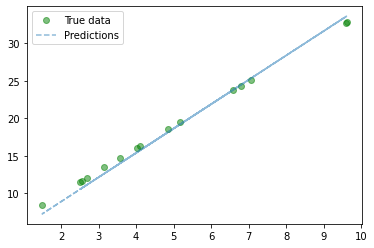

In [ ]:
from matplotlib import pyplot as plt

##plot the predicted values along with the true values
plt.plot(x_test, y_test , 'go', label='True data', alpha=0.5)
plt.plot(x_test, predicted , '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
print(model.state_dict()['linear.weight'])
print(model.state_dict()['linear.bias'])

tensor([[3.2503]])
tensor([2.4003])
